In [38]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from warnings import filterwarnings 
filterwarnings('ignore')
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import svd
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv('./auto.csv')
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [52]:
X_columns = ['cylinders','displacement','horsepower','weight','acceleration','year','origin']
X = df[X_columns]
y = df['mpg']
X_train,X_test,y_train,y_test=train_test_split(X,y)

<Axes: xlabel='weight', ylabel='year'>

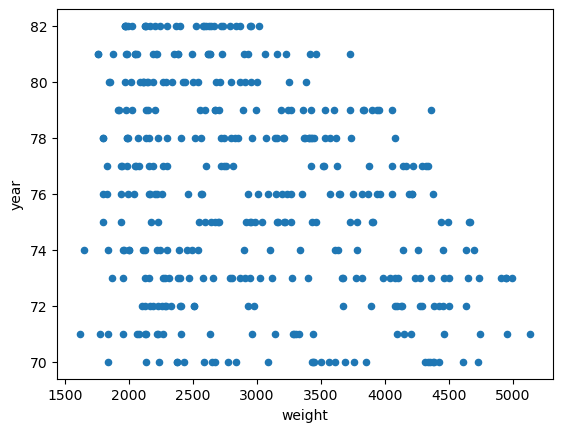

In [43]:
df.plot(kind='scatter',x=4,y=6)

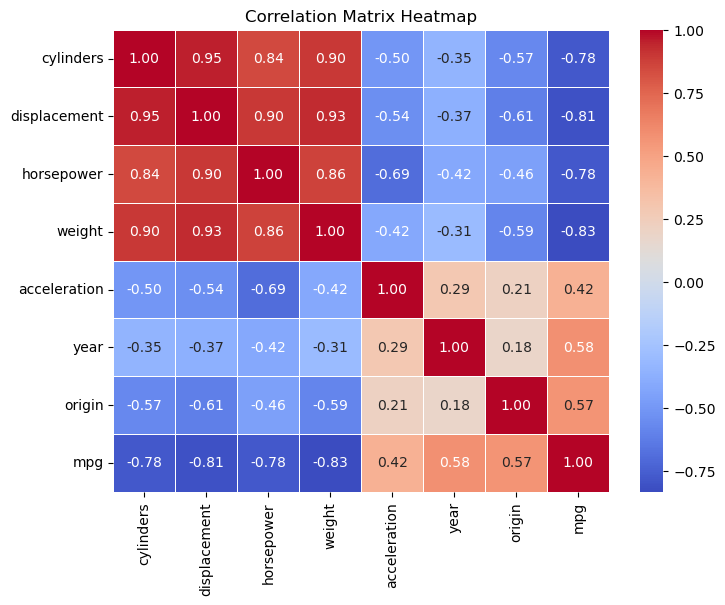

In [56]:

# Create the heatmap plot
plt.figure(figsize=(8, 6))
sns.heatmap(df[['cylinders','displacement','horsepower','weight','acceleration','year','origin','mpg']].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()
#print(type(X.corr()))

In [27]:
X_nona = X.dropna()
X_scaled = (X_nona - X_nona.mean())/X_nona.std()

In [28]:
def pca(X, r = 5):
    x_norm =( X - X.mean())/X.std()
    U, sigma, VT = svd(x_norm, full_matrices=False)
    Sigma = np.diag(sigma)
    Ur = U[:, :r]
    Sigma_r = Sigma[:r, :r]
    return pd.DataFrame(Ur @ Sigma_r, columns = [f'pca_{i}' for i in range(1, r + 1)])

XT = pca(X_scaled)
XT.head()

,pca_1,pca_2,pca_3,pca_4,pca_5
0,-2.640131,0.966885,-0.544595,-0.415996,0.764693
1,-3.374365,1.094525,-0.274640,-0.258221,0.254652
2,-2.988472,1.220613,-0.245860,-0.552493,0.553902
3,-2.818383,1.060927,-0.451427,-0.383852,0.487720
4,-2.866041,1.284320,-0.194501,-0.699661,0.694054


In [33]:
pca = PCA(n_components=5, random_state=42)
components = pca.fit_transform(X_scaled)
components

array([[ 2.64013121, -0.96688522, -0.54459536, -0.41599595,  0.76469302],
       [ 3.37436455, -1.09452477, -0.27464024, -0.25822114,  0.25465167],
       [ 2.98847247, -1.22061313, -0.24585965, -0.55249315,  0.55390212],
       ...,
       [-0.92649249,  0.47928978,  1.62873948, -1.85112429, -0.03980475],
       [-1.63586957,  1.78460986,  0.17897825, -0.42191834, -0.43201817],
       [-1.64411608,  1.93498195,  0.02915616, -0.22332492, -0.55290475]])